# Coding Assignment Two: World Development Indicators - Reproductive Health

In this code, I will analyze reproductive health factors from one of the World Bank Group's World Development Indicators tables (2.14). The code will use web scraping APIs to collect the large tabular data, convert it into a Pandas DataFrame, and create visualizations to show how the world's overall reproductive health has changed over time.

Source: https://wdi.worldbank.org/table/2.14#

## Data Extraction

The code below imports the packages I will need to scrape the web data successfully and make data visualizations. BeautifulSoup is responsible for extracting the data from the HTML file, requests pulls the information from the URL and stores it as a variable, pandas transforms it into a tabular format, and matplotlib plots the data to represent it visually.

In [1]:
# Importing packages to scrap and visualize the data
from bs4 import BeautifulSoup
import pandas
import requests
from matplotlib import pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Collects the content from the World Bank Group's Reproductive Health page
webpage = requests.get("https://wdi.worldbank.org/table/2.14")
print(webpage.content)

# Reads and parses the content from the site
bs = BeautifulSoup(webpage.content, 'html.parser')

b'\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head><title>\r\n\tWorld Development Indicators | The World Bank\r\n</title><meta http-equiv="x-ua-compatible" content="IE=edge" />  \r\n\r\n    <script type="text/javascript" src="//script.crazyegg.com/pages/scripts/0058/1350.js" async="async"></script>\r\n\r\n    <link href="/styles/css/bootstrap.css" rel="stylesheet" />\r\n    <!-- Custom styles for this template -->\r\n    <link href="/styles/css/main.css " rel="stylesheet" />\r\n    <link href="/styles/css/responsive.css" rel="stylesheet" />\r\n    <link href="/styles/css/icon.css" rel="stylesheet" />\r\n\r\n    <link rel="stylesheet" href="/Styles/style.css" />\r\n    <link rel="stylesheet" href="/Styles/style-Header-Footer-nonArabic.css" type="text/css" />\r\n\r\n    <script src= "/scripts/jquery-1.7.min.js" type="text/javascript"></script>\r\n  

The World Bank Group's table contains a lot of columns to include important statistics regrading reproductive health such as contraceptive prevalence rate, adolescent fertility rate, and even the percentages of pregnant women receiving prenatal care. However, for the purposes of this analysis, I want to focus on the categories that have two separate statistics for years that are about a decade apart.

Looking at data from two different time periods gives a solid picture of how much a factor grew over time, making this quite desirable for data analysis. To do so, the code below only stores the data regarding the country or region's name, the total fertility rate in 1990 vs 2022, and the lifetime risk of maternal mortality in 2000 vs 2020.

It does this by first creating a list of certain column indexes, looping through each row in the table, and extracting only the values from the columns of interest. It then identifies these columns by checking if their index matches one of the numbers in the key_points list, which corresponds to the country name, total fertility rates for both years, and lifetime risk of maternal mortality for the other two rows.

In [4]:
# List of the indexes of the relevant data we're interested in
key_points = [0, 1, 2, 10, 11]
raw_data = []

# Finds and stores all the table elements in the HTML content
tables = bs.find_all('table')

# Iterates through each table found
for table in tables:
  row_data = []
  # Finds and iterates through each row in the table
  for row in table.find_all('tr'):
    # Finds each cell within the row
    cells = row.find_all('td')
    cell_data = []
    # Iterates through each cell to determine if the index is relevant
    for i in range(len(cells)):
      if i in key_points:
        # Strips whitespace and stores the cell content
        cell_data.append(cells[i].text.strip())
    if len(cell_data) == 5:
      # Appends the list of cell content to create a list representing the
      # row's data
      row_data.append(cell_data)

  # Appends each row list to have a list of the table's entire contents
  raw_data.append(row_data)

print(raw_data)

[[], [], [['Afghanistan', '7.6', '4.5', '10', '32'], ['Albania', '2.9', '1.4', '2,900', '8,700'], ['Algeria', '4.6', '2.8', '260', '410'], ['American Samoa', '..', '..', '..', '..'], ['Andorra', '..', '..', '..', '..'], ['Angola', '7.3', '5.2', '18', '79'], ['Antigua and Barbuda', '2.2', '1.6', '810', '2,700'], ['Argentina', '3.0', '1.9', '510', '1,100'], ['Armenia', '2.7', '1.6', '1,400', '2,100'], ['Aruba', '2.3', '1.2', '..', '..'], ['Australia', '1.9', '1.6', '8,600', '19,000'], ['Austria', '1.5', '1.4', '11,000', '14,000'], ['Azerbaijan', '2.7', '1.7', '880', '1,400'], ['Bahamas, The', '2.5', '1.4', '800', '940'], ['Bahrain', '3.8', '1.8', '1,300', '3,000'], ['Bangladesh', '4.5', '2.0', '61', '390'], ['Barbados', '1.7', '1.6', '1,200', '1,900'], ['Belarus', '1.9', '1.5', '3,000', '65,000'], ['Belgium', '1.6', '1.5', '7,000', '12,000'], ['Belize', '4.7', '2.0', '290', '380'], ['Benin', '6.7', '4.9', '36', '36'], ['Bermuda', '1.7', '1.3', '..', '..'], ['Bhutan', '5.6', '1.4', '90', 

## Data Transform

Now that the data has been extracted and contained in the raw_data list, it can be converted to a DataFrame in a tabular format. The following code creates a DataFrame variable called rep_health by iterating over each table in raw_data, appending each row to a new list, and passing said list through the pandas.DataFrame function.

In [5]:
col_names = ['Country', 'Total Fertility Rate: 1990',
             'Total Fertility Rate: 2022',
             'Lifetime Risk of Maternal Mortality: 2000',
             'Lifetime Risk of Maternal Mortality: 2020']

final_data = []
# Iterates through each table found on the webpage
for i in range(len(raw_data)):
  # Iterates through each row
  for j in range(len(raw_data[i])):
    # Cleans the raw data and stores each row in the table
    final_data.append(raw_data[i][j])

# Converts the data into a DataFrame
rep_health = pandas.DataFrame(final_data, columns=col_names)
rep_health

,Country,Total Fertility Rate: 1990,Total Fertility Rate: 2022,Lifetime Risk of Maternal Mortality: 2000,Lifetime Risk of Maternal Mortality: 2020
0,Afghanistan,7.6,4.5,10,32
1,Albania,2.9,1.4,"2,900","8,700"
2,Algeria,4.6,2.8,260,410
3,American Samoa,..,..,..,..
4,Andorra,..,..,..,..
...,...,...,...,...,...
221,Sub-Saharan Africa,6.3,4.5,23,41
222,Low income,6.5,4.5,22,50
223,Lower middle income,4.5,2.7,56,130
224,Upper middle income,2.8,1.6,500,960


Now that the data has been converted into a readable data frame, it is important to clean the table to avoid inaccuracies within the analysis. For example, there are data points from the table that are strings that say "...". Having non-numerical data points can affect the central tendencies and spread of the data, which can be misleading!

To fix this, the following block of code uses a function, make_float, that replaces the commas in the strings with empty strings and uses the try and except functions to either return a float of the variable or 0.0 if a ValueError is raised. This helps ensure that the strings in DataFrame are replaced with usable values that skew the data equally so that the statistics accurately represent the rates. The dropduplicates() and dropna() functions are also used to prevent duplicate or null records from being in the DataFrame.

In [6]:
def make_float(s):
  s = s.replace(',', '')

  try:
    return float(s)
  except ValueError:
    return 0.0

rep_health['Total Fertility Rate: 1990'] = rep_health['Total Fertility Rate: 1990'].apply(make_float)
rep_health['Total Fertility Rate: 2022'] = rep_health['Total Fertility Rate: 2022'].apply(make_float)
rep_health['Lifetime Risk of Maternal Mortality: 2000'] = rep_health['Lifetime Risk of Maternal Mortality: 2000'].apply(make_float)
rep_health['Lifetime Risk of Maternal Mortality: 2020'] = rep_health['Lifetime Risk of Maternal Mortality: 2020'].apply(make_float)

rep_health = rep_health.drop_duplicates()
rep_health = rep_health.dropna()

rep_health

,Country,Total Fertility Rate: 1990,Total Fertility Rate: 2022,Lifetime Risk of Maternal Mortality: 2000,Lifetime Risk of Maternal Mortality: 2020
0,Afghanistan,7.6,4.5,10.0,32.0
1,Albania,2.9,1.4,2900.0,8700.0
2,Algeria,4.6,2.8,260.0,410.0
3,American Samoa,0.0,0.0,0.0,0.0
4,Andorra,0.0,0.0,0.0,0.0
...,...,...,...,...,...
221,Sub-Saharan Africa,6.3,4.5,23.0,41.0
222,Low income,6.5,4.5,22.0,50.0
223,Lower middle income,4.5,2.7,56.0,130.0
224,Upper middle income,2.8,1.6,500.0,960.0


## Data Analysis

Now that the data has been cleaned, it can be analyzed with the pandas and matplotlib packages! We can begin by looking at the summary statistics of the Total Fertility Rate columns in 1990 and 2022 by creating variables referencing the two columns, using the describe function on them, and comparing the overall world births per woman. I am also curious about the ranges in both years, so the code below creates filtered lists with a for loop to obtain an accurate minimum value without our 0.0 values.

In [7]:
print('Summary Statistics for World Wide Fertility Rate in 1990')
tfr_1990 = rep_health['Total Fertility Rate: 1990']
tfr_1990.describe()

print('Summary Statistics for World Wide Fertility Rate in 2022')
tfr_2022 = rep_health['Total Fertility Rate: 2022']
tfr_2022.describe()

lst_1990 = tfr_1990.to_list()
filtered_1990 = []
lst_2022 = tfr_2022.to_list()
filtered_2022 = []

# Filters out 0.0 values from 1990 list
for i in range(len(lst_1990)):
  if lst_1990[i] != 0.0:
    filtered_1990.append(lst_1990[i])

# Filters out 0.0 values from 2022 list
for j in range(len(lst_2022)):
  if lst_2022[j] != 0.0:
    filtered_2022.append(lst_2022[j])

print(f'1990 Min: {min(filtered_1990)}')
print(f'2022 Min: {min(filtered_2022)}')

Summary Statistics for World Wide Fertility Rate in 1990


,Total Fertility Rate: 1990
count,226.000000
mean,3.788938
std,1.949521
min,0.000000
25%,2.100000
50%,3.400000
75%,5.500000
max,8.600000


Summary Statistics for World Wide Fertility Rate in 2022


,Total Fertility Rate: 2022
count,226.000000
mean,2.396460
std,1.265152
min,0.000000
25%,1.500000
50%,2.000000
75%,3.100000
max,6.700000


1990 Min: 1.3
2022 Min: 0.7


The summary statistics for the total feritility rates in these two years makes me believe that the overall births per women has decreased within these 32 years. For one, the mean fertility rate in 1990 was approximately 3.79 births per women, but decreased to 2.40 in 2022. Alongside this, the range in 1990 was from 1.30 - 8.60 but went down to 0.70 - 6.70 in 2022. This could potentially indicate a decline in the world population's fertility rate since the 90s.

Now we can look at the summary statistics for the global lifetime risk of maternal mortality below by using the same code and switching out the variables:

In [8]:
print('Summary Statistics for the Lifetime Risk of Maternal Mortality in 2000')
lrmm_2000 = rep_health['Lifetime Risk of Maternal Mortality: 2000']
lrmm_2000.describe()

print('Summary Statistics for the Lifetime Risk of Maternal Mortality in 2020')
lrmm_2020 = rep_health['Lifetime Risk of Maternal Mortality: 2020']
lrmm_2020.describe()

lst_2000 = lrmm_2000.to_list()
filtered_2000 = []
lst_2020 = lrmm_2020.to_list()
filtered_2020 = []

for i in range(len(lst_2000)):
  if lst_2000[i] != 0.0:
    filtered_2000.append(lst_2000[i])

for j in range(len(lst_2020)):
  if lst_2020[j] != 0.0:
    filtered_2020.append(lst_2020[j])

print(f'1990 Min: {min(filtered_2000)}')
print(f'2022 Min: {min(filtered_2020)}')

Summary Statistics for the Lifetime Risk of Maternal Mortality in 2000


,Lifetime Risk of Maternal Mortality: 2000
count,226.000000
mean,1597.588496
std,2862.825764
min,0.000000
25%,30.000000
50%,275.000000
75%,1375.000000
max,19000.000000


Summary Statistics for the Lifetime Risk of Maternal Mortality in 2020


,Lifetime Risk of Maternal Mortality: 2020
count,226.000000
mean,3641.924779
std,7547.213490
min,0.000000
25%,72.500000
50%,560.000000
75%,2975.000000
max,65000.000000


1990 Min: 9.0
2022 Min: 15.0


The difference between the lifetime risk of maternal mortality from 2000 to 2020 isn't as clear as it is for total fertility rate based on summary statitics alone. For example, the mean risk in 2000 was apporximately 1 woman in every 1597.59 but decreased to 1 woman in every 3641.92 in 2020. This could represent a significant decrease, but could also just be a small jump with the thousands of women being taken into account. The standard deviations for both years are incredibly high, indicating that there could be outliers where some countries have an incredibly small risk. It is also notable that the range for the probabilty of risk was 9 - 19,000 women in 2000 and 15 - 65,000 women in 2020. This gives an idea that there could be a decrease in risk as 2020 clearly has a greater amount of women present, but this is hard to tell without understanding the scales of the data. We can look at some plots for each column to get a better idea!

<Axes: >

Text(0.5, 0, 'Births Per Woman')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Total Fertility Rate: 1990')

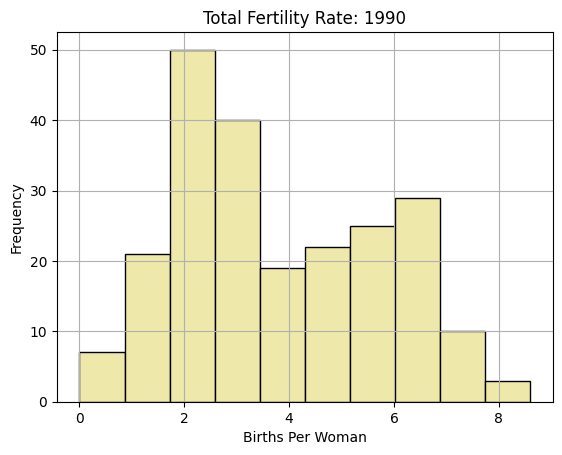

In [9]:
tfr_1990.hist(bins = 10, color = 'palegoldenrod', edgecolor = 'black')
plt.xlabel('Births Per Woman')
plt.ylabel('Frequency')
plt.title('Total Fertility Rate: 1990')

<Axes: >

Text(0.5, 0, 'Births Per Women')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Total Fertility Rate: 2022')

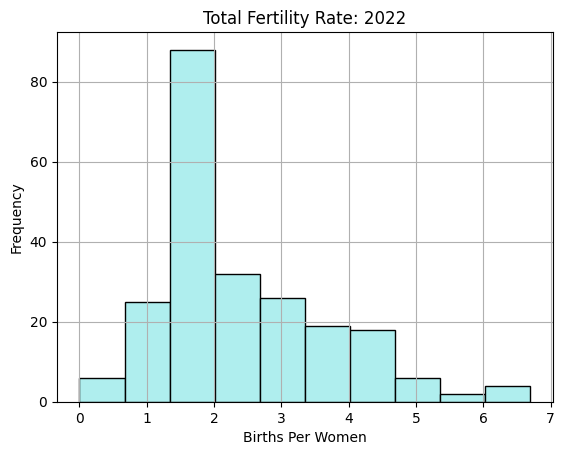

In [10]:
tfr_2022.hist(bins = 10, color = 'paleturquoise', edgecolor = 'black')
plt.xlabel('Births Per Women')
plt.ylabel('Frequency')
plt.title('Total Fertility Rate: 2022')

The histograms for the total fertility rate in 1990 and 2022 are a solid indication that there has been a decline in the worldwide fertility rate in the last 20 years. In 1990, the histogram is slightly right-skewd with a peak frequency of about 50 countries having 1.5 - 2 births per women. It is only slightly right-skewed though because there are a fair amount of countries with 6 - 7 births per woman. However, the 2022 has a clear right-skewed distribution where the highest frequency of 80 countries having about 1 - 1.75 births per woman. Alongside this, the frequencys of over 5 births per woman is incredibly small, especially when comparing this to 1990. These differences between the spreads highlight the change in the global fertility rate.

Now let's look at histograms for the lifetime risk of maternal mortality:

<Axes: >

Text(0.5, 0, 'Probabilty 1 woman in:')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Lifetime Risk of Maternal Mortality: 2000')

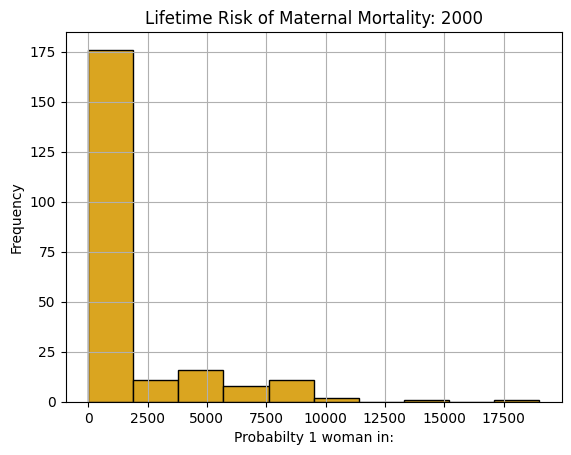

In [11]:
lrmm_2000.hist(bins = 10, color = 'goldenrod', edgecolor = 'black')
plt.xlabel('Probabilty 1 woman in:')
plt.ylabel('Frequency')
plt.title('Lifetime Risk of Maternal Mortality: 2000')

<Axes: >

Text(0.5, 0, 'Probabilty 1 woman in:')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Lifetime Risk of Maternal Mortality: 2020')

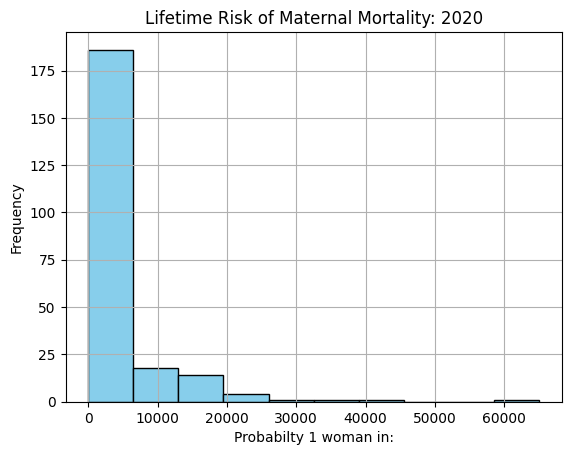

In [12]:
lrmm_2020.hist(bins = 10, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Probabilty 1 woman in:')
plt.ylabel('Frequency')
plt.title('Lifetime Risk of Maternal Mortality: 2020')

The histograms for lifetime risk of maternal mortality are not as effective for understanding the differences from the two years because of the outliers present in the data. For example, while both look extermely similar at first glance, majority of the countries in 2000 have a risk probability of less than 1 in 2,500 women while the most have a risk of less than 1 in 10,000 in 2020. Because of the large outliers present, the code below plots both as boxplots to highlight the differences more effectively with a visual of the spread and outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe473b027a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe473b02ce0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe473b02500>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe473b03220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe473b034c0>],
 'means': []}

Text(0.5, 0, 'Risk')

Text(0, 0.5, 'Probability 1 woman in:')

Text(0.5, 1.0, 'Lifetime Risk of Maternal Mortality: 2000')

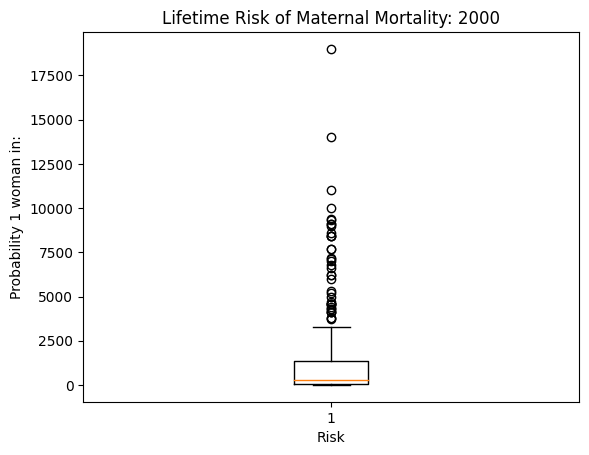

In [13]:
plt.boxplot(lrmm_2000)

plt.xlabel('Risk')
plt.ylabel('Probability 1 woman in:')
plt.title('Lifetime Risk of Maternal Mortality: 2000')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe473b82980>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe473b82da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe473b826e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe473b832e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe473b83580>],
 'means': []}

Text(0.5, 0, 'Risk')

Text(0, 0.5, 'Probability 1 woman in:')

Text(0.5, 1.0, 'Lifetime Risk of Maternal Mortality: 2020')

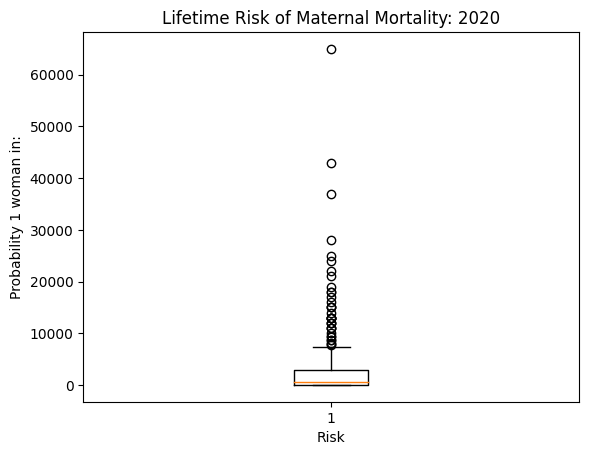

In [14]:
plt.boxplot(lrmm_2020)

plt.xlabel('Risk')
plt.ylabel('Probability 1 woman in:')
plt.title('Lifetime Risk of Maternal Mortality: 2020')

While still looking fairly similar, the boxplots indicate a more clear decline in the lifetime risk of maternal mortality from 2000 to 2020 as a lower median and narrower interquartile range can be seen in 2020. In 2000, the median risk was higher, with the whiskers extending to around 2,500, while in 2020 they are lower, indicating a reduced risk.

## Data Load

Now let's finally transfom the data frame into a proper csv file and upload it to Data World!

In [15]:
rep_health.to_csv("World Development Indicators - Reprodcutive Health.csv")

Data World Link: https://data.world/chinonyemgboji/world-development-indicators-reproductive-health

# Summary

From the analysis and visualizations from the World Bank's data, it is evident that there has been a global shift in women's reproductive health over the past few decades. The total fertility rate has steadily declined since the 1990s, with far fewer women giving birth to five or more children by 2022. This reduction can be attributed to a variety of factors such as increased access to contrapectives, a rise in the cost of living, or even a societal shift in the desire to become parents.

Alongside this, the risk of maternal mortality has decreased considerably worldwide. In 2000, the average probability of maternal death was approximately 1 in 1597, whereas by 2020, this amount had improved to around 1 in 3642. This decrease in risk might stem from the large advancements in healthcare technology and access to prenatal care since the early 2000s.

These combined trends reflect a global improvement in women's reproductive health, demonstrating the impact of health innovations, societal changes, and improved access to healthcare. However, despite these gains, continued efforts are essential to further reduce fertility rates where desired and ensure maternal health improvements reach the most vulnerable populations.